In [1]:
import numpy as np
import pandas as pd
from datetime import datetime
from fuzzywuzzy import process, fuzz
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings("ignore")

C:\Users\romai\anaconda3\lib\site-packages\fuzzywuzzy\fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
#import book dataset
df=pd.read_csv("C:/Users/romai/Documents/DSTI/4-Python Labs/Project/Python/dataset/books_v2.csv", index_col="bookID", on_bad_lines = 'error')

#Needed Cells from Cleaning

In [5]:
#move to FE
#Renaming '  num_pages' in order to remove the extra spaces and displaying columns names
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [6]:
df['language_code'] = df['language_code'].replace('en-US','eng')
df['language_code'] = df['language_code'].replace('en-GB','eng')
df['language_code'] = df['language_code'].replace('en-CA','eng')

In [8]:
pub = df.publisher.unique()
elements = list(pub)
# elements = ['vikash', 'vikas', 'Vinod', 'Vikky', 'Akash', 'Vinodh', 'Sachin', 'Salman', 'Ajay', 'Suchin', 'vIkas', 'salman', 'salMa', 'Akash', 'vikahs']

results = [[name, [], 0] for name in elements]

for (i, element) in enumerate(elements):
    for (j, choice) in enumerate(elements[i+1:]):
        if fuzz.ratio(element, choice) >= 90:
            results[i][2] += 1
            results[i][1].append(choice)
            results[j+i+1][2] += 1
            results[j+i+1][1].append(element)

data = pd.DataFrame(results, columns=['name', 'duplicates', 'duplicate_count'])

data = data.sort_values(by=['duplicate_count'],ascending=False)

KeyboardInterrupt: 

In [ ]:
to_remove = []
test = {}

for i,j in data.iterrows():
    if data.name[i] in list(test.keys()):
        for x in j.duplicates:
            if x not in test : 
                test[x]=test[data.name[i]]
    else : 
        test[data.name[i]] = data.name[i]
        for x in j.duplicates:
            if x not in test : 
                test[x]=data.name[i]
#                 print(data.name[i], "****", x,"--" , data.name[i])
        

                    
# print(test)
data['pub'] = data['name'].map(test)
display(data)

In [ ]:
df['publisher_iso'] = df['publisher'].map(test)

In [ ]:
df

# Visualization
to be added in EDA 

## Rating distribution

**move to EDA (part of description)**

<function matplotlib.pyplot.show(close=None, block=None)>

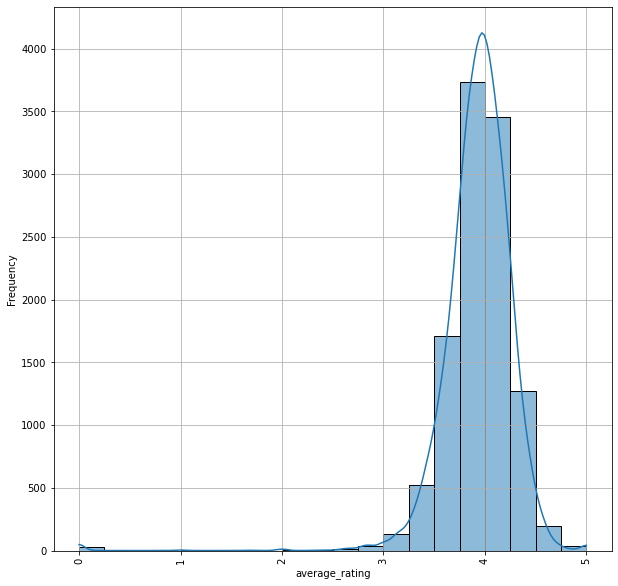

In [17]:
plt.figure(figsize=(10,10))
sns.histplot(df['average_rating'], kde = True, bins = 20, palette = "hls" )
plt.xticks(rotation = 90)
plt.ylabel('Frequency')
plt.grid()
plt.show

--> Median= 3.9/4 as showed in the describe table

## Categorizing average rating and creating an extra column

In [18]:
bins = [0, 1, 2, 3, 4, 5]
label = ['<1', '1-2', '2-3', '3-4', '4-5']
df['cat_rating'] = pd.cut(df['average_rating'], bins, labels=label)

In [19]:
rating_frequency = df["cat_rating"].value_counts()
print((rating_frequency))

3-4    6288
4-5    4735
2-3      69
1-2       7
<1        2
Name: cat_rating, dtype: int64


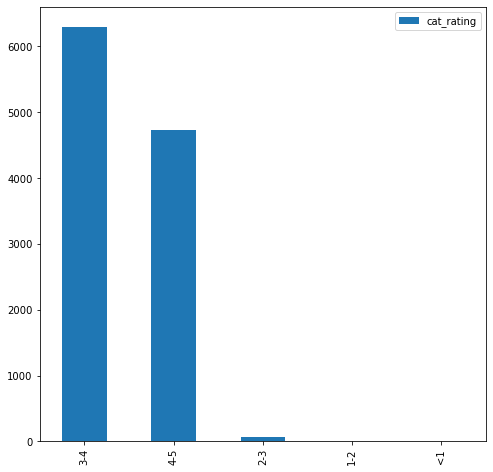

In [20]:
# Chart for average rating by category 
# Adding the % for the histogram (couldn't)

hist = df['cat_rating'].value_counts().plot(kind = 'bar', figsize=(8, 8)).legend()


In [21]:
# Move to exploratory part 
high_rated_author = df[df['average_rating']>=4.4]
high_rated_author

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cat_rating
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,439785960,9.780000e+12,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4-5
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,439358078,9.780000e+12,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,4-5
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,439554896,9.780000e+12,eng,352,6333,244,11/01/2003,Scholastic,4-5
5,Harry Potter and the Prisoner of Azkaban (Harr...,J.K. Rowling/Mary GrandPré,4.56,043965548X,9.780000e+12,eng,435,2339585,36325,05/01/2004,Scholastic Inc.,4-5
8,Harry Potter Boxed Set Books 1-5 (Harry Potte...,J.K. Rowling/Mary GrandPré,4.78,439682584,9.780000e+12,eng,2690,41428,164,9/13/2004,Scholastic,4-5
...,...,...,...,...,...,...,...,...,...,...,...,...
44734,Fullmetal Alchemist Vol. 6 (Fullmetal Alchemi...,Hiromu Arakawa/Akira Watanabe,4.58,1421503190,9.780000e+12,eng,200,10052,201,3/21/2006,VIZ Media LLC,4-5
44826,The Price of the Ticket: Collected Nonfiction ...,James Baldwin,4.70,312643063,9.780000e+12,eng,712,404,30,9/15/1985,St. Martin's Press,4-5
44849,Code Check Electrical: An Illustrated Guide to...,Michael Casey/Redwood Kardon/Douglas Hansen,4.67,1561587389,9.780000e+12,eng,29,3,0,11/11/2005,Taunton Press,4-5


The same title has the same avg rating but all other columns are different 


In [14]:
df.loc[df['title'] == "The Odyssey"]

,title,authors,average_rating,isbn,isbn13,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cat_rating
bookID,,,,,,,,,,,,
1381,The Odyssey,Homer/Robert Fagles/Bernard Knox,3.76,143039954,9.780000e+12,eng,541,760871,6557,11/30/2006,Penguin Classics,3-4
1382,The Odyssey,Homer/Robert Fitzgerald/D.S. Carne-Ross,3.76,374525749,9.780000e+12,eng,515,1713,179,11/05/1998,Farrar Straus and Giroux,3-4
1383,The Odyssey,Homer/Richmond Lattimore,3.76,60931957,9.780000e+12,eng,374,1131,78,06/01/1999,Harper Perennial,3-4
1384,The Odyssey,Homer/E.V. Rieu/Peter Jones/D.C.H. Rieu,3.76,140449116,9.780000e+12,eng,324,2543,167,1/30/2003,Penguin Classics,3-4
1387,The Odyssey,Homer/W.H.D. Rouse,3.76,451527364,9.780000e+12,eng,304,262,24,08/01/1999,Signet Classics,3-4
19282,The Odyssey,Homer/Robert Fitzgerald/Seamus Heaney,3.76,1857150945,9.780000e+12,eng,509,48,3,10/08/1992,Everyman,3-4
26447,The Odyssey,Homer/Edward McCrorie/Richard P. Martin,3.76,801882672,9.780000e+12,eng,472,57,2,8/23/2005,Johns Hopkins University Press,3-4
37804,The Odyssey,Homer/George Herbert Palmer,3.76,486406547,9.780000e+12,eng,239,242,25,12/23/1998,Dover Publications,3-4


## 10 Most published authors 

<AxesSubplot:xlabel='authors'>

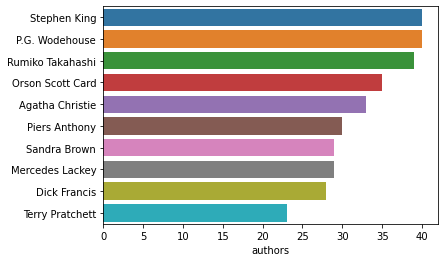

In [15]:
count_authors = df['authors'].value_counts().head(10)
count_authors
sns.barplot(x = count_authors, y = count_authors.index)

## TOP 10 publisher (before and after)

In [16]:
df.publisher_iso.value_counts()

AttributeError: 'DataFrame' object has no attribute 'publisher_iso'

In [ ]:
count_publisher = df['publisher'].value_counts().head(10)
sns.barplot(x = count_publisher, y = count_publisher.index)

In [ ]:
count_publisher_iso = df['publisher_iso'].value_counts().head(10)
sns.barplot(x = count_publisher_iso, y = count_publisher.index)

## TOP 5 Languages

In [ ]:
df['language_code'].value_counts().head(5).plot(kind = 'pie', autopct='%1.1f%%', figsize=(8, 8)).legend()

## Count per series (same title)

In [ ]:
count_title = df.title.value_counts()[:10]
sns.barplot(x = count_title, y = count_title.index)

## Outliers

In [ ]:
#Checking for Outliers columns: num_pages, Text Reviews Count, ratings_count
#num_pages Violin Plot 
fig = px.violin(df.num_pages, y="num_pages")
fig.show()

#Text Reviews Count Violin Plot 
fig2 = px.violin(df.text_reviews_count, y="text_reviews_count")
fig2.show()

#Ratings Count(in million) Violin Plot 
fig3 = px.violin(df.ratings_count, y="ratings_count")
fig3.show()

# Correlation

## Average Rating (>=4.4) //  10 authors

In [ ]:
df.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')

In [ ]:
high_rated_title = df[df['average_rating']>=4.4]
high_rated_author = high_rated_title.groupby('authors')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('authors')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_author['title'], high_rated_author.index, palette='Set2')
ax.set_xlabel("Number of Books Average rating > 4.4")
ax.set_ylabel("Authors")


## Average Rating (>=4.4) // publisher 

In [ ]:
high_rated_title = df[df['average_rating']>=4.4]
high_rated_publisher = high_rated_title.groupby('publisher_iso')['title'].count().reset_index().sort_values('title', ascending = False).head(10).set_index('publisher_iso')
plt.figure(figsize=(15,10))
ax = sns.barplot(high_rated_publisher['title'], high_rated_publisher.index, palette='Set2')
ax.set_xlabel("Number of Books Average rating > 4.4")
ax.set_ylabel("Publisher")

***
**MOVE TO EDA** (below)

In [ ]:
### Average Rating // number of pages
ax1 = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax1.set_axis_labels("Average Rating", "Number of Pages")

#Average Rating // Text Review Count
ax2 = sns.jointplot(x="average_rating", y="text_reviews_count", data = df, color = 'orange')
ax2.set_axis_labels("Average Rating", "Text review Count")

#Average Rating // Reviews Count
ax2 = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'violet')
ax2.set_axis_labels("Average Rating", "Ratings Count")


#plt.show()

## Average Rating // languages

In [ ]:
df.groupby('language_code')['average_rating'].agg(['mean','count'])

# Feature Engineering:
- Delete Unnecessary columns 
- Filling missing values 
- Dropping outliers for columns: num_pages, ratings count, Text review Count

In [22]:
#Renaming '  num_pages' in order to remove the extra spaces and displaying columns names
df.rename(columns={'  num_pages':'num_pages'}, inplace=True)

In [23]:
#Dropping useless columns: isbn and isbn13
df = df.drop(columns = ['isbn','isbn13'])

In [24]:
#Dropping Authors = "NOT A BOOK"
#df = df.drop(df[df.authors == "NOT A BOOK"].index)
#df[df.authors == 'NOT A BOOK']

#NOT A BOOK are audio book so keep (see part on PAGES)

In [25]:
df.head(2)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cat_rating
bookID,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4-5
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,4-5


## Title

## Authors

In [26]:
# single author vs multiple authors -> new column "Authors_2" = Single/Multiple -> boolean
df['number_of_authors']=np.where(df['authors'].str.split(pat="/").str.len()==1, "single", "multiple")

#keep 1st author in case of multiple authors and analyze correlation
df['primary_author']=df['authors'].str.split(pat="/").str[0]

df.head(3)

,title,authors,average_rating,language_code,num_pages,ratings_count,text_reviews_count,publication_date,publisher,cat_rating,number_of_authors,primary_author
bookID,,,,,,,,,,,,
1,Harry Potter and the Half-Blood Prince (Harry ...,J.K. Rowling/Mary GrandPré,4.57,eng,652,2095690,27591,9/16/2006,Scholastic Inc.,4-5,multiple,J.K. Rowling
2,Harry Potter and the Order of the Phoenix (Har...,J.K. Rowling/Mary GrandPré,4.49,eng,870,2153167,29221,09/01/2004,Scholastic Inc.,4-5,multiple,J.K. Rowling
4,Harry Potter and the Chamber of Secrets (Harry...,J.K. Rowling,4.42,eng,352,6333,244,11/01/2003,Scholastic,4-5,single,J.K. Rowling


In [27]:
df.groupby(["number_of_authors"]).describe().average_rating

,count,mean,std,min,25%,50%,75%,max
number_of_authors,,,,,,,,
multiple,4564.0,3.964963,0.357029,0.0,3.8075,3.99,4.17,5.0
single,6563.0,3.911842,0.347588,0.0,3.7500,3.94,4.11,5.0


In [28]:
df.groupby(["number_of_authors"]).describe().ratings_count

,count,mean,std,min,25%,50%,75%,max
number_of_authors,,,,,,,,
multiple,4564.0,13947.581288,101337.197228,0.0,70.0,400.0,2563.75,2339585.0
single,6563.0,20710.294530,119546.777221,0.0,161.5,1193.0,7209.00,4597666.0


***
Number of books an pages per authors and average rating

In [ ]:
author=df.groupby('primary_author').agg({'average_rating':['count','mean'], 'num_pages':['mean']})
author.columns = [" ".join(x) for x in author.columns.ravel()]
author

In [ ]:
ax3 = sns.jointplot(y="average_rating count", x="average_rating mean", data = author, color = 'violet')
ax4 = sns.jointplot(y="num_pages mean", x="average_rating mean", data = author, color = 'green')

plt.show()

In [27]:
from sklearn.preprocessing import OneHotEncoder

#creating instance of one-hot-encoder
encoder = OneHotEncoder(handle_unknown='ignore')

#perform one-hot encoding on 'team' column 
encoder_df = pd.DataFrame(encoder.fit_transform(df[['title']]).toarray())

#merge one-hot encoded columns back with original DataFrame
encoder_df

,0,1,2,3,4,5,6,7,8,9,...,10342,10343,10344,10345,10346,10347,10348,10349,10350,10351
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11123,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11124,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11125,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [30]:
from sklearn.feature_extraction.text import CountVectorizer
count_vectorizer = CountVectorizer()
bag_of_words = count_vectorizer.fit_transform(df['primary_author'])
bag_of_words = pd.DataFrame(bag_of_words.toarray(), columns = count_vectorizer.get_feature_names())
bag_of_words


,19,abaire,abani,abbey,abbie,abbott,abdal,abdul,abdulin,abe,...,zwiebach,zwonitzer,zöllner,åsne,émile,éric,özdamar,čapek,ōe,žižek
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11122,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11123,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11124,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11125,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [ ]:
bags=

***
Average number of pages per author and average rating

In [ ]:
author_page=df.groupby('primary_author')['num_pages'].mean()
frames=[author_page, author]
pd.concat(frames,axis=1).sort_values('count', ascending = False)

## Publication_date

In [ ]:
#Change the format of column "publication_date" 
# to match with standard date format then add 2 new columns "Month" and "Year" -> seasonality effect?
df['publication_date'] = pd.to_datetime(df['publication_date'], dayfirst = False, yearfirst = False, errors = 'coerce')

In [ ]:
df.head(2)

In [ ]:
df.isna().sum()

In [ ]:
df.loc[df.publication_date.isna(),:]

those 2 dates are unreal in the sense that
    # November doesn't have 31 days (11/31/2000)
    # June doesn't have 31 days (31/06/1982)
    
=> replace by correct date for those 2 rows

    #31373 published October 31, 2000 by Bantam Books (https://www.goodreads.com/book/show/31373.In_Pursuit_of_the_Proper_Sinner?ac=1&from_search=true&qid=3A5Zotzgsy&rank=1)
    
    #45531 published June 30, 1982 by Folio histoire (https://www.goodreads.com/book/show/45531.Montaillou_village_occitan_de_1294_1324)

In [ ]:
#correcting 2 NaT by correct date
df.loc[31373,"publication_date"]='10/30/2000'
df.loc[45531,"publication_date"] ='6/30/1982'
df.loc[[31373,45531]]

In [ ]:
# Splitting date column into month and year columns - move in FE
df['publication_month'] = df['publication_date'].dt.strftime('%m')
df['publication_year'] = df['publication_date'].dt.strftime('%Y')

df.head(2)

In [ ]:
print("Type of publication_month is:", df.publication_month.dtypes)
print("Type of publication_year is:",df.publication_year.dtypes)
#return type 'Object' -> convert to integer type

In [ ]:
df['publication_month']=df.publication_month.astype(int)
df['publication_year']=df.publication_year.astype(int)

In [ ]:
df.groupby(["publication_month"]).describe().average_rating

In [ ]:
yearly_rating=df.groupby(["publication_year"]).describe().average_rating
yearly_rating

In [ ]:
ax1 = sns.jointplot(y="average_rating", x="publication_year", data = df, color = 'crimson')
ax1.set_axis_labels("year", "Average Rating",)

ax2 = sns.jointplot(y="average_rating", x="publication_month", data = df, color = 'crimson')
ax2.set_axis_labels("month", "Average Rating")

## Pages

In [ ]:
df.num_pages.describe()

In [ ]:
df.num_pages.value_counts().sort_index(axis = 0).head(30)

In [ ]:
df[df.num_pages == 1].head(15)

* Num_pages == 0 to 15 seems to be Audio Books -> remove or create a new column AUDIBLE vs READABLE
***

In [ ]:
publisher_df=df
publisher_df['publisher_group']=publisher_df.publisher.str[0]
publisher_df=publisher_df.groupby('publisher_group').publisher.value_counts().to_frame('counts').sort_values(by = ['publisher'])
print(publisher_df.to_string())

In [ ]:
audio_df=df[df.num_pages>24]
audio_df.sort_values(by = ['num_pages']).head(10)

In [ ]:
# look at different publisher name to see if audio book or not
keep= ["fono"]

#filter for rows that contain the partial string "Wes" in the conference column
df[df.publisher.str.contains('|'.join(keep))].sort_values(by = ['num_pages'])

# "Tantor Media"-containing publisher name = AUDIO (note: pages <= 6)
# "Caedmon"-containing publisher name = AUDIO (note: pages <= 11)
# "HarperFestival"-containing publisher name = AUDIO (note: 1 "book" counts 31 pages but it's 31 CDs)
# "Pimsleur"-containing publisher name = AUDIO (note: only 1 book)
# "FonoLibro"-containing publisher name = AUDIO (note: only 1 book - 18 pages
# "Disney Press", Warne" AND "TSR Inc" publish short book for kids
# "Studio"-containing publisher name = only paper book - to keep

Create new column "Type" with 2 categories: AUDIBLE or READABLE
* 1. Select title with CD
* 2. Apply on publisher based on the list ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
* 3. Apply on num_pages <=15 (assumption that all books with less (or equal) than 15 pages are Audio)

In [ ]:
keep= ["Audio", "Record", "Sound", "Tape", "Tantor", "Warner Adult", "HarperFestival","Pimsleur", "FonoLibro"]
conditions = [df.authors == 'NOT A BOOK', df.title.str.contains('|'.join(["CD"])), df.publisher.str.contains('|'.join(keep)), df.num_pages <= 15]
choices =['audible','audible', 'audible','audible']                                                                                  
df['type'] = np.select(conditions, choices, default="readable")                                                                             
                                                                                  
#df[df.authors == 'NOT A BOOK']
df.head(15)

In [ ]:
df.groupby(["type"]).describe().average_rating
#imbalanced 

In [ ]:
ax3 = sns.jointplot(y="average_rating", x="type", data = df, color = 'crimson')
ax3.set_axis_labels("Type", "Average Rating")

In [ ]:
#Replacing the 'num_pages' 0 values with the mean and checking the result
#df['num_pages'] = df['num_pages'].replace(0,df['num_pages'].mean())

In [ ]:
#len(df[df.num_pages > 1500])

In [ ]:
#Dropping outliers for 'num_pages' column 
#df = df.drop(index = df[df.num_pages > 1500].index)

In [ ]:
ax1 = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'blue')
ax1.set_axis_labels("Average Rating", "Number of Pages")

## Rating_count

In [ ]:
len(df[df.ratings_count > 2000000])

In [ ]:
#Dropping outliers for 'ratings_count' column 
df = df.drop(index = df[df.ratings_count > 2000000].index)

In [ ]:
# Dropping the rows where the 'ratings_count' of a book is set to 0 and the average rating is different from 0 
df = df.drop(index = df[df.average_rating == 0].index)

## Text_Review

In [ ]:
len(df[df.text_reviews_count > 50000])

In [ ]:
#Dropping outliers for 'text_reviews_count' column 
df = df.drop(index = df[df.text_reviews_count > 50000].index)

##  Average_rating / ratings_counts / text_review_counts

In [ ]:
print('Number of average_rating = 0: ', df['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0])
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])

#rating = 0 with rating_count = 0 -> is it relevant to keep it ro should we replace by the average rating?
# average_rating but no ratings_count or texte_reviews_count? how to consider them

In [ ]:
df[df.average_rating==0].describe()

In [ ]:
df[df.average_rating==0].loc[df.text_reviews_count!=0]
#1 text review but no rating associated (ratings count =0)

Based on those observations, an average rating equal to 0 have a rating count equal to 0 and a text review equal to 0 <br>
There is only one case where we have a text review but still no rating count <br>
Those 26 rows (average rating = 0) are suspicious based on that.<br>

Remove or keep them (that could help predict a rating of 0 meaning that no one take the time to rate a book because it's too long!)
***

In [ ]:
df=df.drop(df.loc[df.average_rating ==0].index)
df.describe()

In [ ]:
#print('Number of average_rating = 0: ', books_df_copy['average_rating'].value_counts()[0])
print('Number of rating_counts = 0: ', df['ratings_count'].value_counts()[0]) #80-26=54
print('Number of text_reviews_count = 0: ', df['text_reviews_count'].value_counts()[0])#622-26+1 ( text review=1)= 600

Still 55 rating_count equal to 0 whereas we have an average_rating at least equal to 1 => how can we have a rating without any count? <br> Let's dig a bit more
***

In [ ]:
df[df.ratings_count==0].head(5)

Replace 0 by average ratings_counts or drop? **Replace** by mean ratings_counts

In [ ]:
avg_rating_count=df[df['ratings_count']!=0].ratings_count.mean()
avg_rating_count

In [ ]:
df.ratings_count.replace(to_replace = 0, value =avg_rating_count ,inplace = True)
df['ratings_count'].describe()

In [ ]:
df['text_reviews_count'].describe()

In [ ]:
df['text_reviews_count'].value_counts()[0]

In [ ]:
#Average Rating // Text Review Count
ax2 = sns.jointplot(x="average_rating", y="text_reviews_count", data = df, color = 'orange')
ax2.set_axis_labels("Average Rating", "Text review Count")

#drop text_reviews_count above 30000?

#Average Rating // Reviews Count
ax2 = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'violet')
ax2.set_axis_labels("Average Rating", "Ratings Count")


plt.show()

In [ ]:
# Dropping the rows where the  average rating of a book is set to 0 AND rating counts set to 0
#len(df.loc[(df[df.text_reviews_count == 0]) & (df['ratings_count'] == 0)])

## Average_rating
Create a new feature combining average rating and number of rating and/or nulber of text rating

In [ ]:
rating_df= df[['title','average_rating','ratings_count','text_reviews_count']]
rating_df.head(10)

In [ ]:
rating_df=rating_df.drop(columns =['book_occurence', 'weighted_text_reviews'])

rating_df['book_occurence'] = df.groupby('title')['title'].transform('count')
rating_df['weighted_text_reviews']=rating_df['text_reviews_count']/rating_df['ratings_count']


rating_df.head(10)

In [ ]:
rating_df.corr()

## Visualization w/o outliers

In [ ]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [ ]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="num_pages", data = df, color = 'crimson')
ax.set_axis_labels("Average Rating", "Number of Pages")

Best rated books are between 180 and 420 pages

In [ ]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="ratings_count", data = df, color = 'violet')
ax.set_axis_labels("Average Rating", "ratings_count")

In [ ]:
plt.figure(figsize=(15,10))
sns.set_context('paper')
ax = sns.jointplot(x="average_rating", y="text_reviews_count", data = df, color = 'orange')
ax.set_axis_labels("Average Rating", "text_reviews_count")

# Next Steps

1. In the correlation section
   * Avg rating // language (visual)
   * Avg rating for top published authors over time (year) (bof)
   * Avg rating for top publishers over time (bof)
   * Corr month publication // avg rating / rating counts / text review
   * Corr year publication // avg rating / rating counts / text review
   

2. jointplot for text_reviews_count and ratings_count --> no histogram 

3. After dropping all outliers, how does the heatmap look like? 

4. Transforming categorical columns into numerical columns 
    * Title
    * Authors 
    * Language 
    * Publisher 

5. New column that identifies if the book has been written by a single or multiple authors
    Or trying to select only the first author of the book 

6. Identify similar publishers ??? 

7. Dropping the rows where the avg rating is 0

8. Dropping the rows where rating counts and text review counts are set to 0